# Finding correlated variables

In this activity, you will look for variables in a dataset that have a high correlation with many other variables. This is not the best selection criteria to remove variables, but helps you to understand and work with the code for correlation analysis.

## The data

In [22]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn import datasets

# Use this code if you need large figures (on high-resolution screens)
#plt.rcParams["figure.dpi"] = 144

data = pd.read_csv("cars.csv",sep=',')

# Only retain the continuous variables for this exercise
data = data.select_dtypes(include=['float64']).copy()
data = data.dropna()

# Print the various variables to get to know them
for index, name in zip(range(0,len(data.columns)),data.columns):
    print('Variable '+str(index)+'\t '+name)

Variable 0	 normalized-losses
Variable 1	 wheelbase
Variable 2	 length
Variable 3	 width
Variable 4	 height
Variable 5	 bore
Variable 6	 stroke
Variable 7	 compression
Variable 8	 hp
Variable 9	 rpm
Variable 10	 price


## Correlation information

Print the correlation:

In [23]:
correlation = data.corr()
print(correlation)

                   normalized-losses  wheelbase    length     width    height  \
normalized-losses           1.000000  -0.064001  0.029114  0.104857 -0.417081   
wheelbase                  -0.064001   1.000000  0.871968  0.815935  0.558764   
length                      0.029114   0.871968  1.000000  0.839184  0.505156   
width                       0.104857   0.815935  0.839184  1.000000  0.298403   
height                     -0.417081   0.558764  0.505156  0.298403  1.000000   
bore                       -0.036167   0.580484  0.649059  0.575048  0.261501   
stroke                      0.065627   0.164012  0.116049  0.192891 -0.095364   
compression                -0.129971   0.293968  0.188968  0.261530  0.237432   
hp                          0.290906   0.514507  0.666726  0.678779  0.032264   
rpm                         0.240676  -0.292491 -0.239104 -0.235906 -0.251236   
price                       0.199924   0.734789  0.760323  0.843316  0.247500   

                       bore

Make the correlation plot:

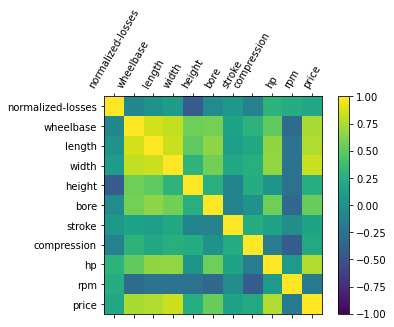

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

for tick in ax.get_xticklabels():
    tick.set_rotation(60)

ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

## Finding the correlated variables

Create a function that removes variables that have a higher average (absolute) correlation with the other variables (make sure to take the absolute correlation between variables) than a certain threshold. Return them as a list of their column names to_remove. This allows us to find variables that are too correlated with many other variables and hence might cause problems in our dataset. 

In [25]:
def remove_variables(data, threshold):
    to_remove = []
    correlation = data.corr()
    ### BEGIN SOLUTION
    # Loop the correlation matrix for every variable
    for var_1 in correlation:
        # If the mean absolute correlation of the variable is higher than the threshold, add to the removal list
        if np.mean(abs(correlation[var_1])) > threshold:
            to_remove.append(var_1)
    ### END SOLUTION
    
    return sorted(to_remove)

Verify your answer by checking the variables that should be removed:

In [26]:
remove_variables(data,0.5)

['length', 'price', 'wheelbase', 'width']

## The result

Let's now visualise the dataset without the highly correlated variables visually at a threshold of 40%:

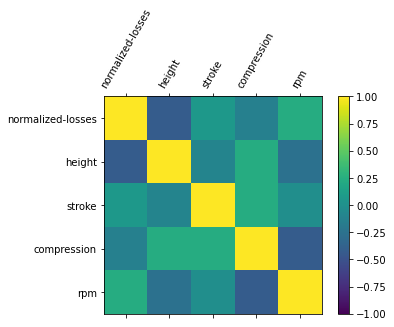

In [27]:
# remove the columns from the data
to_remove = remove_variables(data,0.4)
data_high = data.drop(to_remove,axis=1)
correlation = data_high.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
#
ticks = np.arange(0,len(data_high.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

for tick in ax.get_xticklabels():
    tick.set_rotation(60)

ax.set_xticklabels(data_high.columns)
ax.set_yticklabels(data_high.columns)
plt.show()

The correlation is now much lower. However, some peaks still exist, such as the correlation between compression and rpm. Using this serves rather as a starting point for finding variables that cause problematic correlations.